In [1]:
#!kaggle competitions download -c digit-recognizer  # Uncomment for downloading with the api
#!unzip digit-recognizer.zip                        # Uncomment for unziping
#!mkdir data                                        # Uncomment for creating directory
#!mv digit-recognizer.zip data/                     # Uncomment these three to move all the files
#!mv sample_submission.csv data/                    
#!mv train.csv data/
#!mv test.csv data/

In [2]:
import os
os.listdir(".")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

sample_submission_path = "data/sample_submission.csv"
train_path = "data/train.csv"
test_path = "data/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

y_train = train_df["label"]
X_train = train_df.drop("label", axis = 1)

print(train_df.shape)

(42000, 785)


In [3]:
# We known in this case that there is no missing values or disgusting things we have to handle
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
number_of_missings = {}
total_missings = 0
for col in train_df.columns:
    missings_in_column = train_df[col].isna().sum()
    total_missings += missings_in_column
    number_of_missings[col] = missings_in_column
    
#number_of_missings
print(f"Total number of missings: {total_missings}")

Total number of missings: 0


<AxesSubplot:>

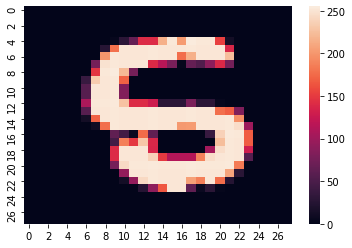

In [5]:
# Lets check one of the samples just
x_train = train_df.iloc[:,1:]
one_sample = x_train.iloc[19]
one_sample = one_sample.values.reshape(28, 28)
sns.heatmap(data = one_sample)

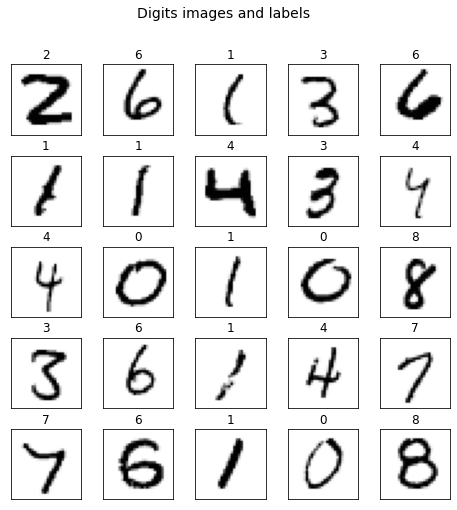

In [6]:
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
fig.suptitle("Digits images and labels", fontsize=14)
ax = ax.ravel()
for i in range(25):
    sample_n = random.randint(0, x_train.shape[0])
    ax[i].imshow(np.array(x_train.iloc[sample_n]).reshape(28, 28), cmap="Greys")
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(y_train[sample_n], fontsize = 12)

plt.subplots_adjust(hspace=0.3)

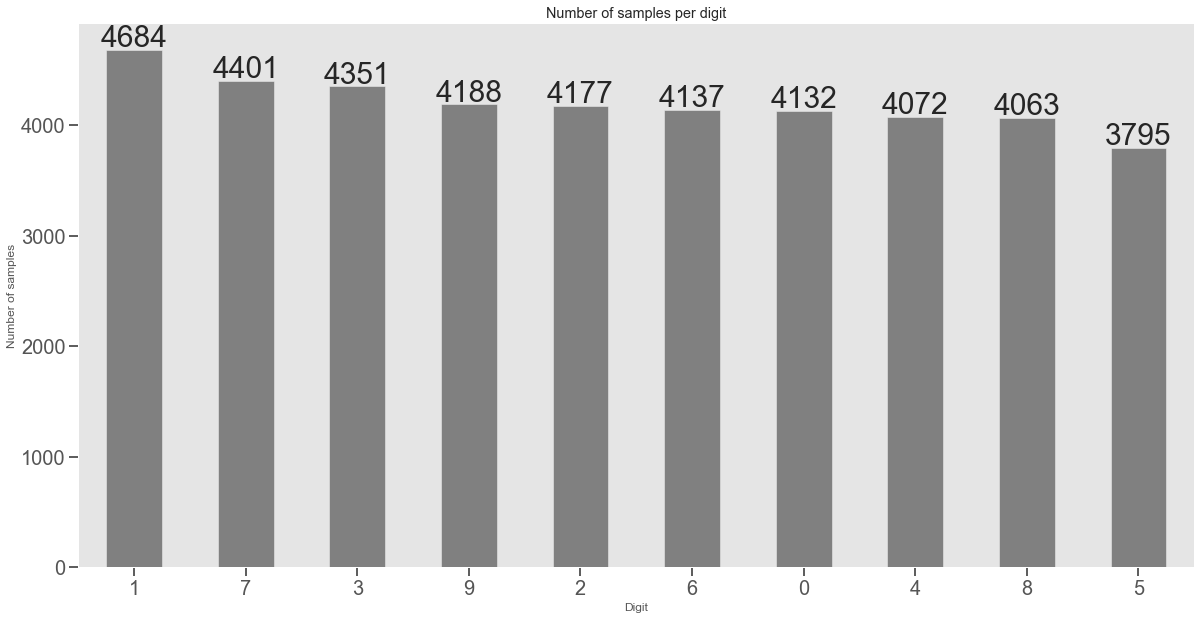

In [7]:
sns.set(
    style = "ticks", 
    context = "talk",
    font_scale = 1
)

plt.style.use("ggplot")
plt.figure(figsize = (20,10))

samples_per_label = train_df["label"].value_counts().sort_values(ascending = False)
ax = samples_per_label.plot(
    kind = "bar",
    grid = False,
    fontsize = 20,
    color = "grey"
)

plt.xticks(rotation = 0)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 30, height, ha = 'center', size = 30)
    
plt.title("Number of samples per digit")
plt.ylabel("Number of samples")
plt.xlabel("Digit")
sns.despine()

In [8]:
train_df["label"].value_counts(normalize = True) * 100
# Lets assume their unbalanceness is not relevant in this particular case

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

In [9]:
# Feature engineering: in this case we are only going to normalize the data
x_train = X_train / 255
test = test_df / 255

In [10]:
# Lets save files to use them later
x_train.to_csv("data/x.csv")
train_df["label"].to_csv("data/y.csv")